# **Deep-Learning Lab: 4**

**Name:** Praveen Choudhary

**Prn :** 23070243065


## **Project : Housing Price**

**Dataset :** https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india

**Github :** https://github.com/Praveen1034/Housing-Price

**Model Applied :** Multi-Regression, SVR, Random Forest, Stacking SVR,Sequential (ANN)

In [3]:
# import library
import pandas as pd
import numpy as np

In [4]:
# read data
data = pd.read_csv("/content/House Price India.csv")

In [5]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


### **Summary of data**

In [6]:
print('Number of columns in dataset : {}'.format(data.shape[1]))
print('Number of rows in dataset : {}'.format(data.shape[0]))
print('Size of the dataset : {}'.format(data.size))

Number of columns in dataset : 23
Number of rows in dataset : 14620
Size of the dataset : 336260


In [7]:
data.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [8]:
# Drop customer name and email id:
data.drop(columns=['id','Date'],inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

In [10]:
# Duplicate items
data.duplicated().sum()

0

In [11]:
# Null Value
data.isnull().sum()

,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0
Area of the house(excluding basement),0


In [12]:
data['number of floors'].value_counts()

,count
number of floors,
1.0,7103
2.0,5666
1.5,1311
3.0,418
2.5,118
3.5,4


In [13]:
data['Postal Code'].value_counts()

,count
Postal Code,
122028,432
122005,416
122006,397
122007,396
122033,383
...,...
122013,77
122062,62
122036,49


In [14]:
data['number of bedrooms'].value_counts()

,count
number of bedrooms,
3,6612
4,4724
2,1844
5,1079
6,176
1,136
7,30
8,11
9,3


In [15]:
data['number of bathrooms'].value_counts()

,count
number of bathrooms,
2.50,3678
1.00,2509
1.75,2062
2.25,1378
2.00,1323
1.50,968
2.75,831
3.00,510
3.50,504


### **Descriptive Statistics**

In [18]:
data.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,7.682421,1801.783926,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,1.175033,833.809963,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [19]:
import pandas as pd
from scipy import stats

# Extract all column names into a list
column_names = data.columns.tolist()

# Initialize lists to store test results
results = []

# Perform Shapiro-Wilk test on each column and collect the results
for col in column_names:
    try:
        # Perform Shapiro-Wilk test
        stat, p_value = stats.shapiro(data[col])

        # Determine normality based on p-value
        normality_check = p_value > 0.05

        # Append results to the list
        results.append([col, stat, p_value, normality_check])
    except Exception as e:
        # If the column data is not suitable for Shapiro-Wilk test (e.g., non-numeric data), append None
        results.append([col, None, None, None])
        print(f"Could not perform Shapiro-Wilk test on {col}: {e}")

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Column Name', 'Shapiro-Wilk Statistic', 'P-Value', 'Normality Check'])



# Display the table nicely formatted in Markdown format
markdown_table = results_df.to_markdown(index=False, tablefmt="pipe", floatfmt=["", ".4f", ".4e", ""])
print("\nMarkdown Table:")
print(markdown_table)



Markdown Table:
| Column Name                           |   Shapiro-Wilk Statistic |     P-Value | Normality Check   |
|:--------------------------------------|-------------------------:|------------:|:------------------|
| number of bedrooms                    |                   0.8321 | 2.4015e-81  | False             |
| number of bathrooms                   |                   0.9346 | 1.4202e-61  | False             |
| living area                           |                   0.9118 | 1.4673e-67  | False             |
| lot area                              |                   0.2678 | 7.8464e-118 | False             |
| number of floors                      |                   0.7539 | 3.7246e-90  | False             |
| waterfront present                    |                   0.0586 | 9.5434e-125 | False             |
| number of views                       |                   0.3376 | 3.9390e-115 | False             |
| condition of the house                |               

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14620.
  res = hypotest_fun_out(*samples, **kwds)


+ The p-values from the Shapiro-Wilk test for the numeric data are all greater than 0.05.
+ This suggests that there is significant evidence to accept the null hypothesis, indicating that the data is Not normally distributed.


### **EDA**

In [20]:
#
import matplotlib.pyplot as plt
import seaborn as sns

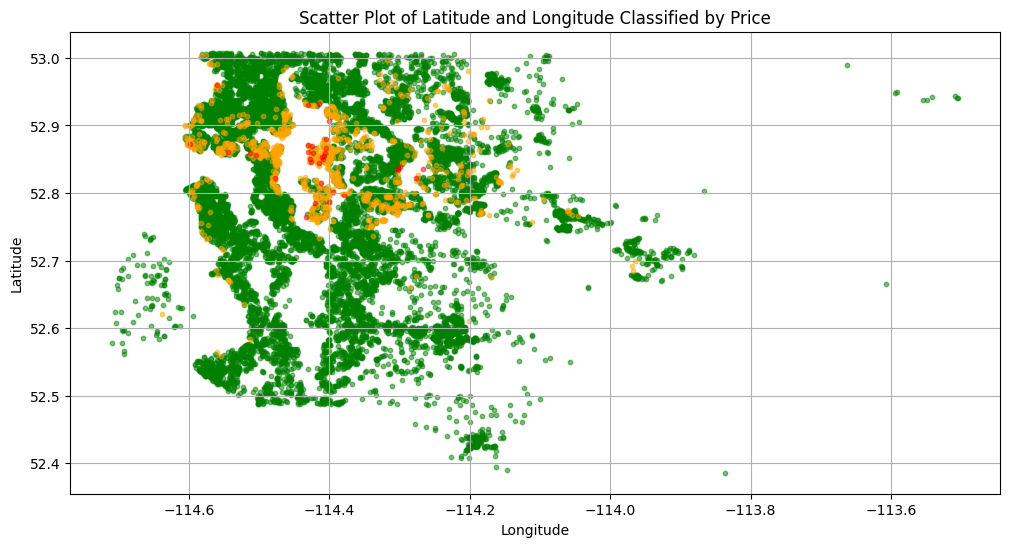

In [21]:
# Work with a copy of the DataFrame to avoid modifying the original
temp_data = data.copy()

# Categorizing Price into bins without changing the original DataFrame
price_bins = [79000, 1000000, 3000000, 7700000]  # Define the bins for price
price_labels = ['Low', 'Medium', 'High']         # Labels for the price categories
temp_data['Price_Category'] = pd.cut(temp_data['Price'], bins=price_bins, labels=price_labels)

# Setting color map for the price categories
colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}

# Plotting the latitude and longitude classified by price
plt.figure(figsize=(12, 6))
for category, color in colors.items():
    subset = temp_data[temp_data['Price_Category'] == category]
    plt.scatter(subset['Longitude'], subset['Lattitude'], alpha=0.5, c=color, s=10, label=category)

plt.title('Scatter Plot of Latitude and Longitude Classified by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

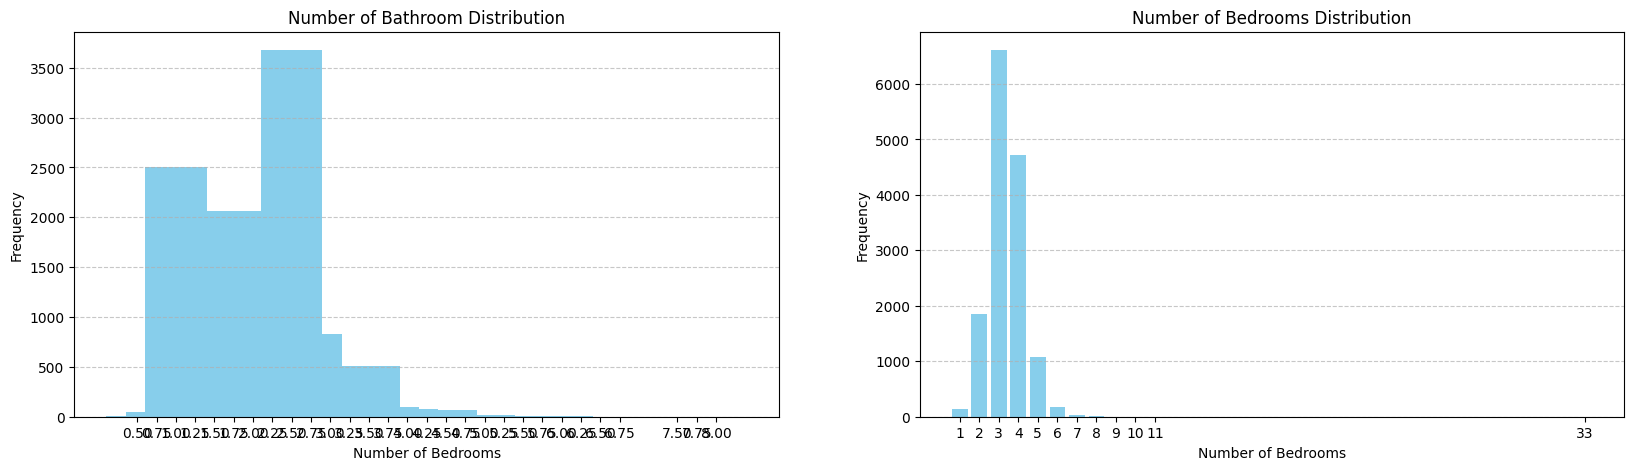

In [22]:
# Count the frequency of each unique number of bedrooms
bathroom_counts = data['number of bathrooms'].value_counts().sort_index()
bedroom_counts = data['number of bedrooms'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(bathroom_counts.index, bathroom_counts.values, color='skyblue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Number of Bathroom Distribution')
plt.xticks(bathroom_counts.index)  # To ensure all x-ticks are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines for better readability

plt.subplot(1,2,2)
plt.bar(bedroom_counts.index, bedroom_counts.values, color='skyblue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Number of Bedrooms Distribution')
plt.xticks(bedroom_counts.index)  # To ensure all x-ticks are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines for better readability

plt.show()


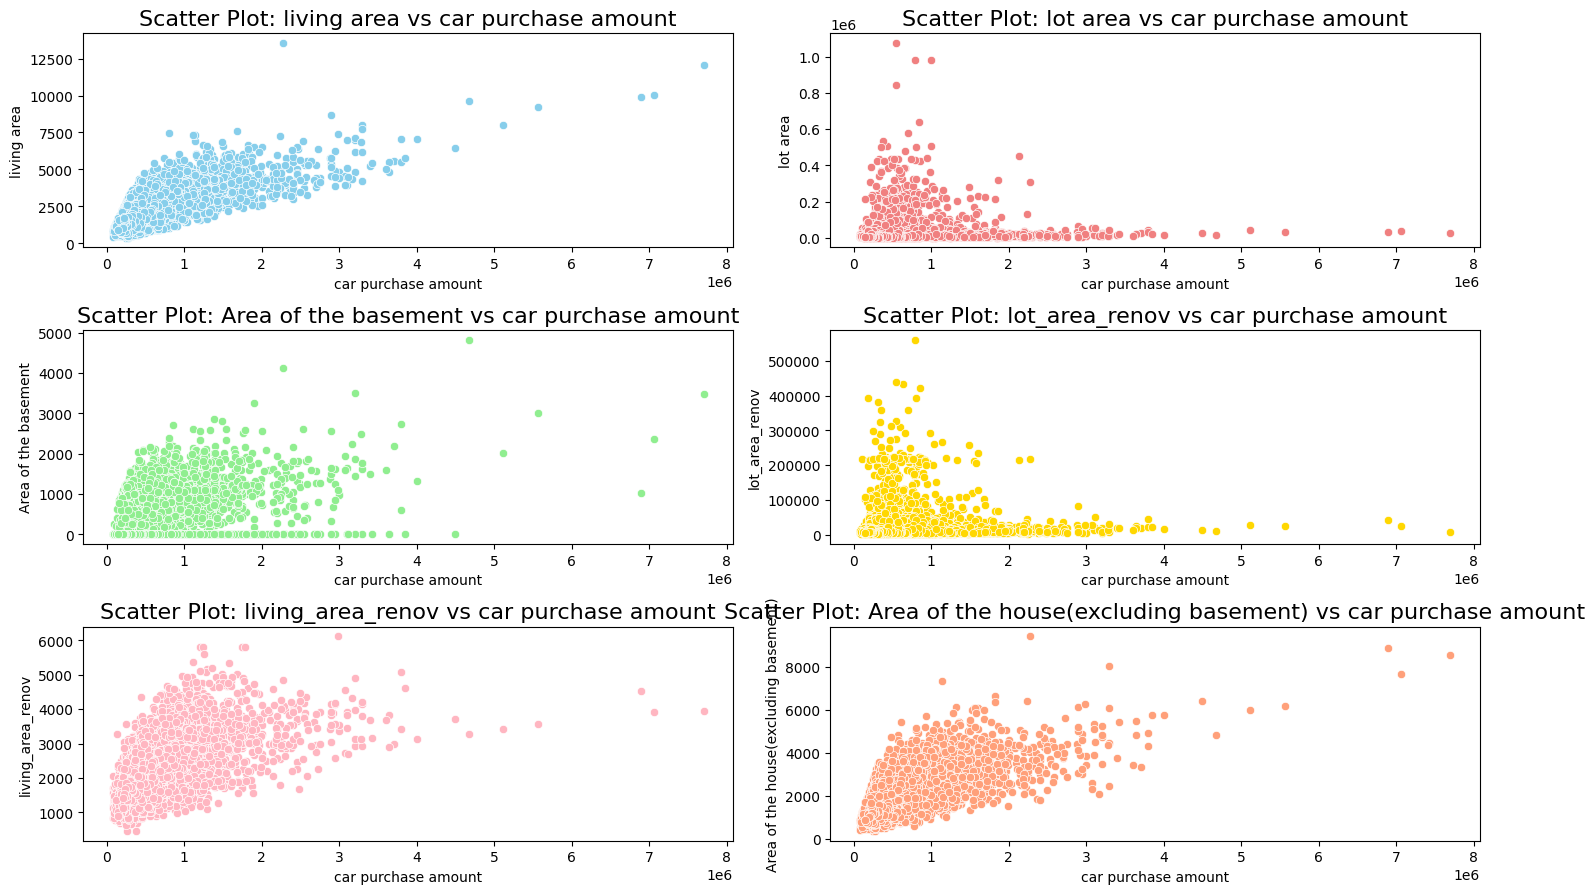

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['living area','lot area','Area of the basement', 'lot_area_renov', 'living_area_renov','Area of the house(excluding basement)']

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Extended the colors list to match the number of columns
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink', 'lightsalmon']

# Scatter plot for each column
for i, col in enumerate(columns):
    row_num = i // 2
    col_num = i % 2

    sns.scatterplot(x='Price', y=col, data=data, color=colors[i], ax=axes[row_num, col_num])
    axes[row_num, col_num].set_title(f'Scatter Plot: {col} vs car purchase amount', fontsize=16)
    axes[row_num, col_num].set_xlabel('car purchase amount')
    axes[row_num, col_num].set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


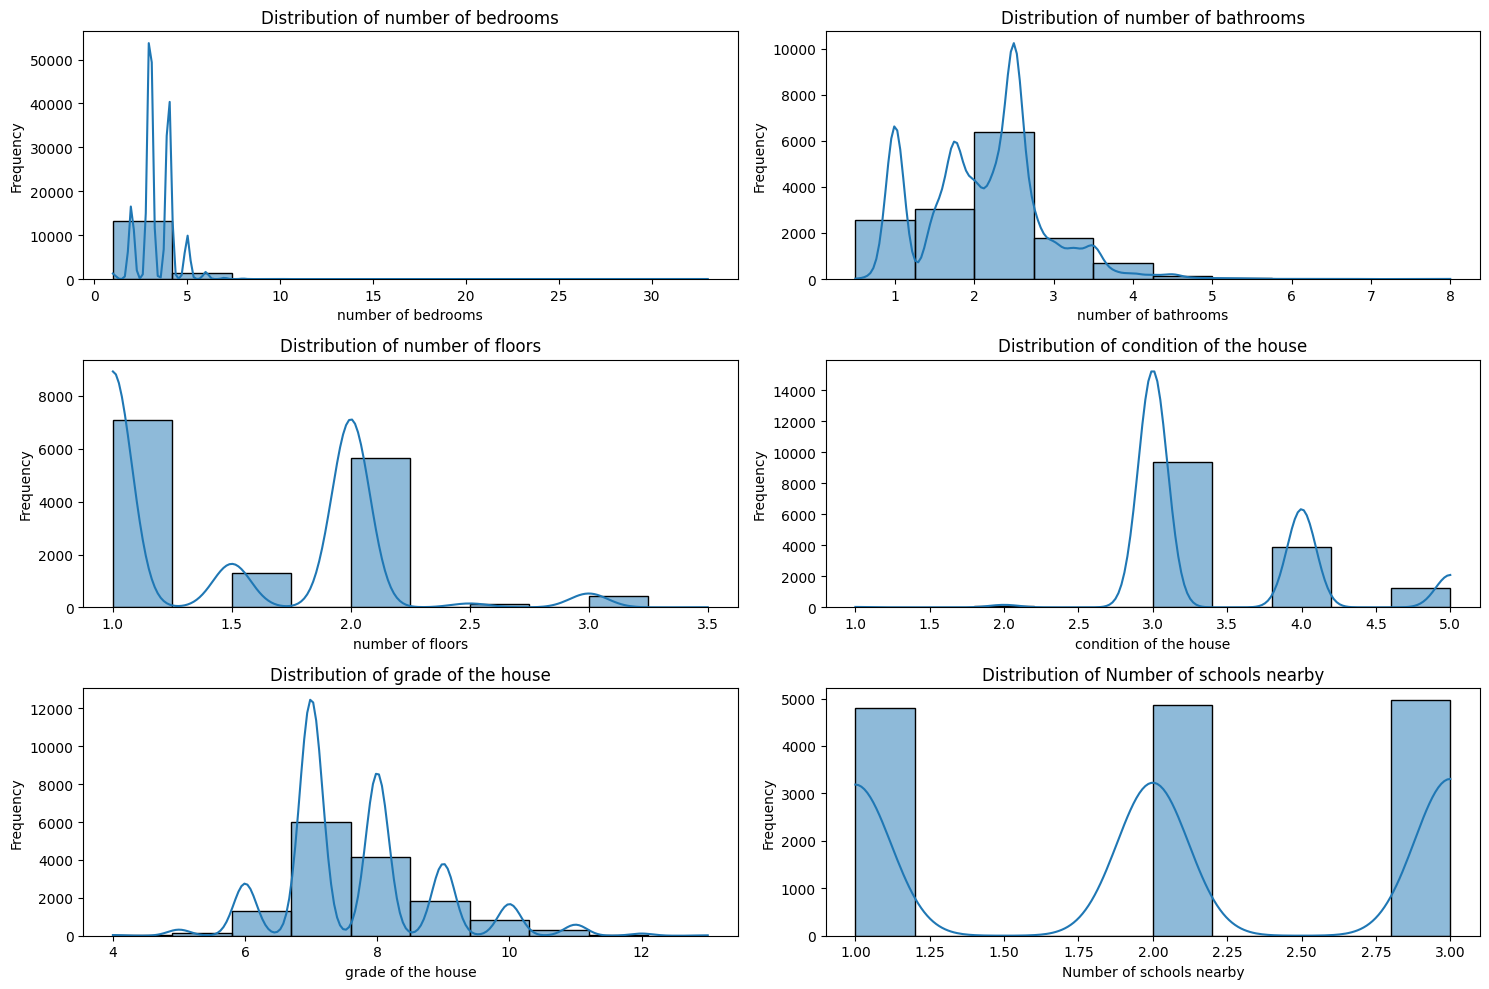

In [24]:
# Histograms
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

hist_cols = ['number of bedrooms', 'number of bathrooms', 'number of floors', 'condition of the house', 'grade of the house',"Number of schools nearby"]

for i, col in enumerate(hist_cols):
    row_num = i // 2
    col_num = i % 2
    sns.histplot(data[col], bins=10, kde=True, ax=axes[row_num, col_num])
    axes[row_num, col_num].set_title(f'Distribution of {col}')
    axes[row_num, col_num].set_xlabel(col)
    axes[row_num, col_num].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

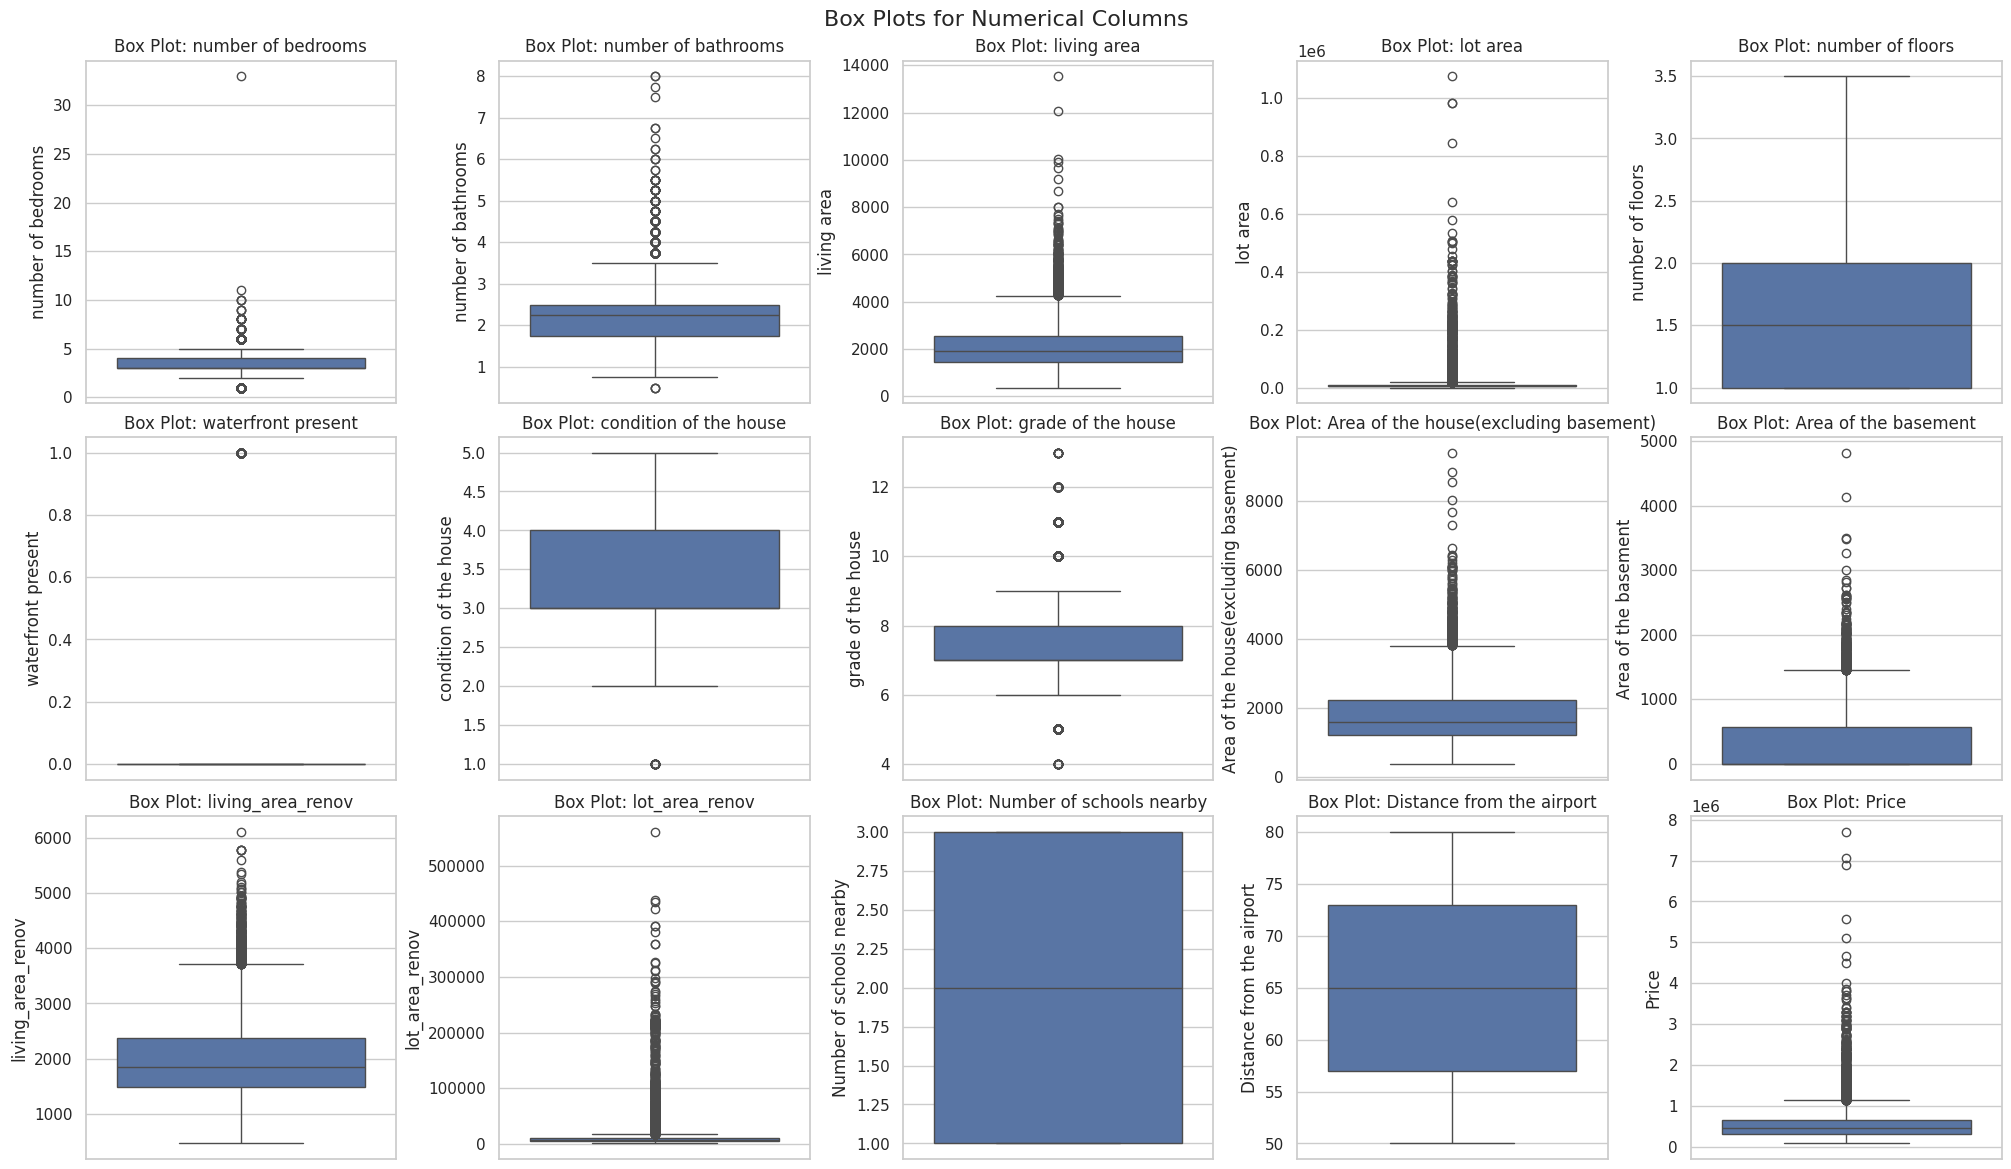

In [25]:
# Set the style
sns.set(style="whitegrid")

# Create box plots for each numerical column
fig, axes = plt.subplots(4, 5, figsize=(20, 15), constrained_layout=True)

# List of numerical columns
numerical_columns = [
    'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors',
    'waterfront present', 'condition of the house', 'grade of the house',
    'Area of the house(excluding basement)', 'Area of the basement',
     'living_area_renov', 'lot_area_renov',
    'Number of schools nearby', 'Distance from the airport', 'Price'
]

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    row = i // 5
    col_num = i % 5
    sns.boxplot(y=data[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Box Plot: {col}', fontsize=12)
    axes[row, col_num].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(len(numerical_columns), 20):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Box Plots for Numerical Columns', fontsize=16)
plt.show()

In [26]:
data.columns.tolist()

['number of bedrooms',
 'number of bathrooms',
 'living area',
 'lot area',
 'number of floors',
 'waterfront present',
 'number of views',
 'condition of the house',
 'grade of the house',
 'Area of the house(excluding basement)',
 'Area of the basement',
 'Built Year',
 'Renovation Year',
 'Postal Code',
 'Lattitude',
 'Longitude',
 'living_area_renov',
 'lot_area_renov',
 'Number of schools nearby',
 'Distance from the airport',
 'Price']

In [27]:
# Function to remove outliers from a specific column using IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from 'Price' and 'number of bathrooms'
data = remove_outliers(data, 'Price')
# data = remove_outliers(data, 'number of bedrooms')
# data = remove_outliers(data, 'number of bathrooms')
# data = remove_outliers(data, 'living area')
# data = remove_outliers(data, 'lot area')
# data = remove_outliers(data, 'Area of the house(excluding basement)')
# data = remove_outliers(data, 'Area of the basement')
# data = remove_outliers(data, 'lot area')
# data = remove_outliers(data, 'living_area_renov')
# data = remove_outliers(data, 'lot_area_renov')

# data = remove_outliers(data, 'waterfront present')
data = remove_outliers(data, 'condition of the house')
# data = remove_outliers(data, 'grade of the house')



In [28]:
len(data)

13841

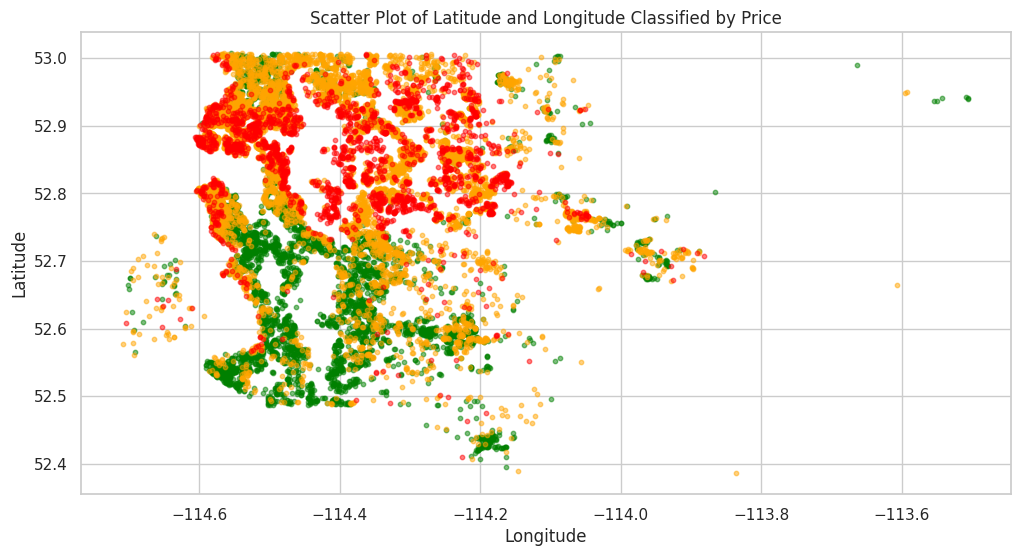

In [29]:
# Work with a copy of the DataFrame to avoid modifying the original
temp_data = data.copy()

# Categorizing Price into bins without changing the original DataFrame
price_bins = [0, 350000, 700000, 1130000]  # Define the bins for price
price_labels = ['Low', 'Medium', 'High']         # Labels for the price categories
temp_data['Price_Category'] = pd.cut(temp_data['Price'], bins=price_bins, labels=price_labels)

# Setting color map for the price categories
colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}

# Plotting the latitude and longitude classified by price
plt.figure(figsize=(12, 6))
for category, color in colors.items():
    subset = temp_data[temp_data['Price_Category'] == category]
    plt.scatter(subset['Longitude'], subset['Lattitude'], alpha=0.5, c=color, s=10, label=category)

plt.title('Scatter Plot of Latitude and Longitude Classified by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

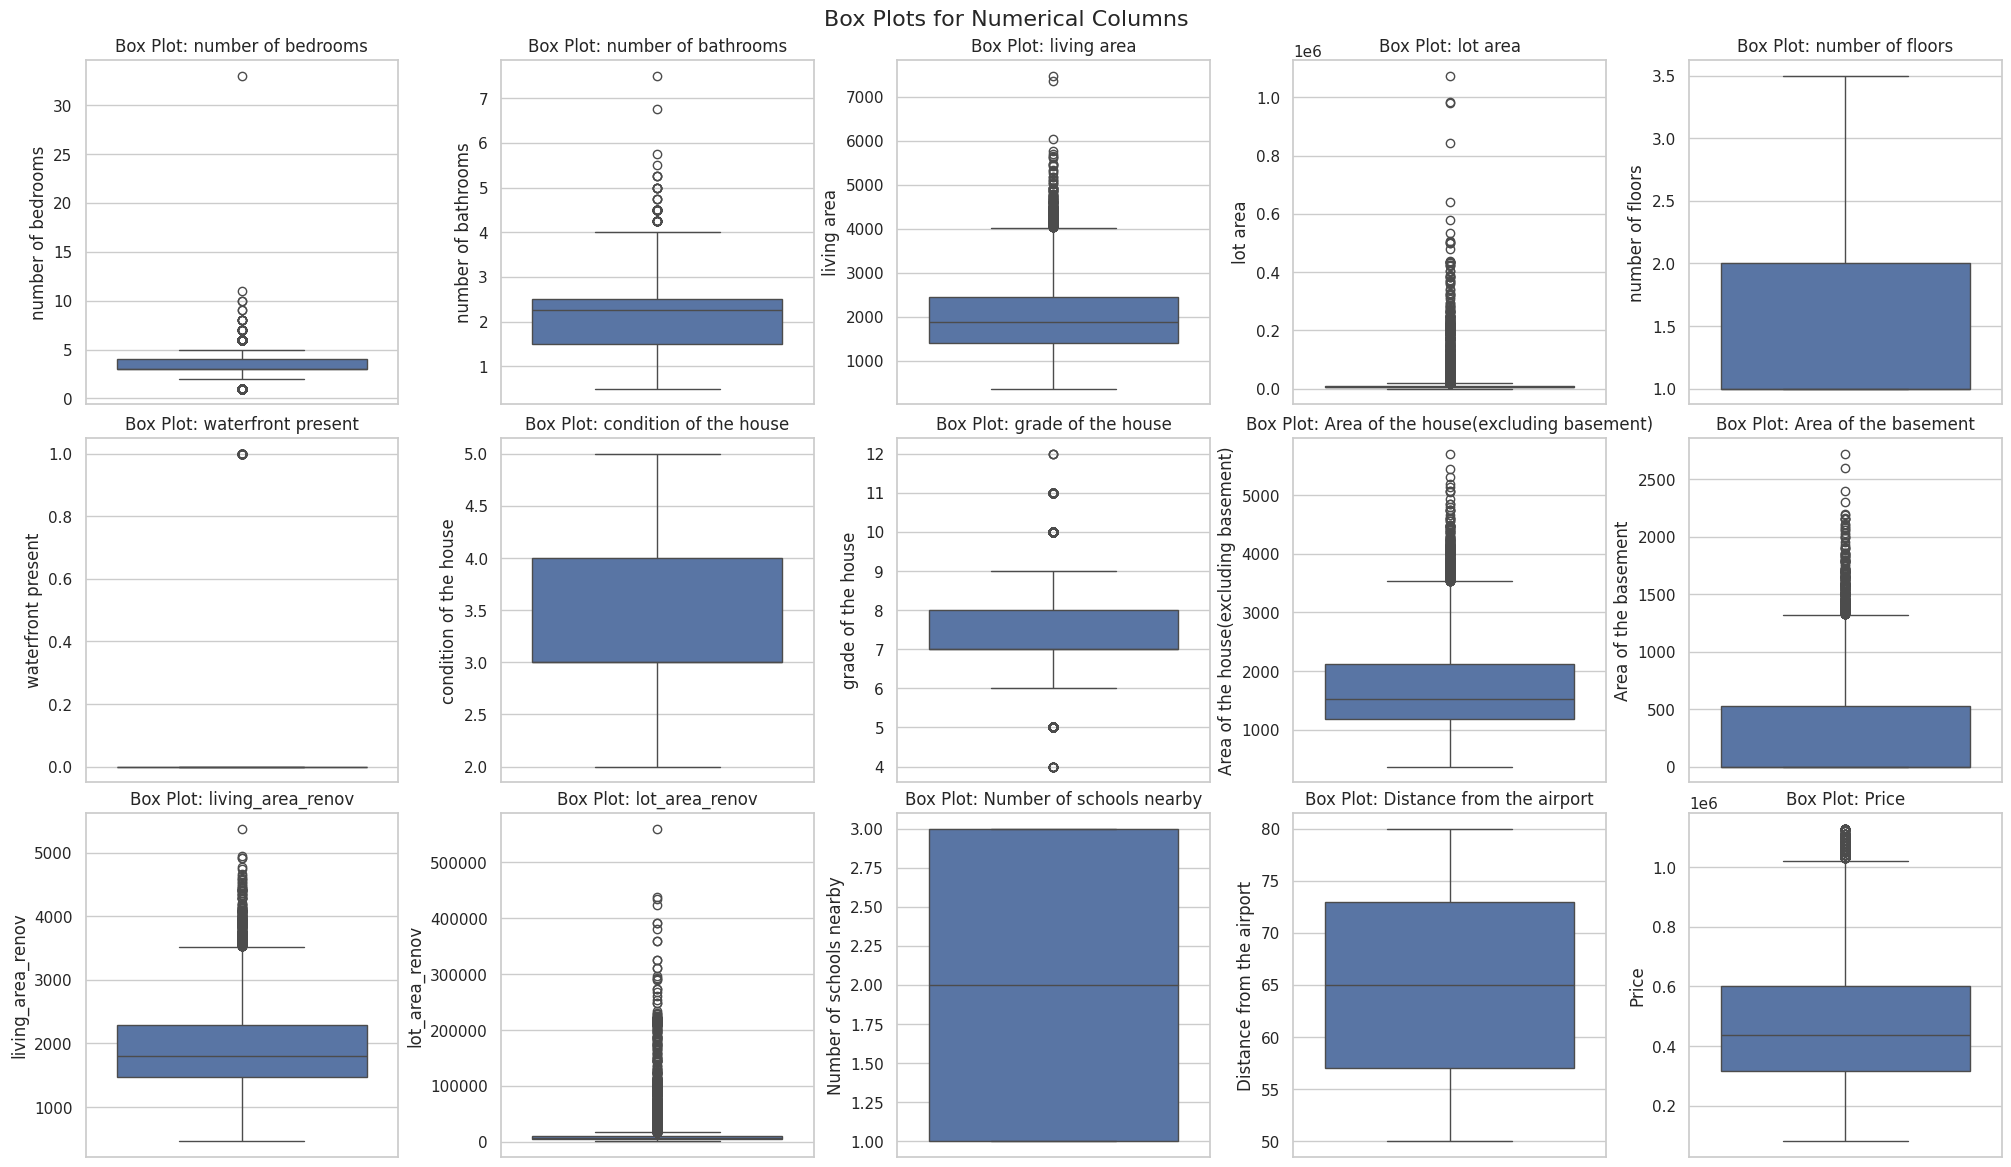

In [30]:
# Set the style
sns.set(style="whitegrid")

# Create box plots for each numerical column
fig, axes = plt.subplots(4, 5, figsize=(20, 15), constrained_layout=True)

# List of numerical columns
numerical_columns = [
    'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors',
    'waterfront present', 'condition of the house', 'grade of the house',
    'Area of the house(excluding basement)', 'Area of the basement',
     'living_area_renov', 'lot_area_renov',
    'Number of schools nearby', 'Distance from the airport', 'Price'
]

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    row = i // 5
    col_num = i % 5
    sns.boxplot(y=data[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Box Plot: {col}', fontsize=12)
    axes[row, col_num].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(len(numerical_columns), 20):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Box Plots for Numerical Columns', fontsize=16)
plt.show()

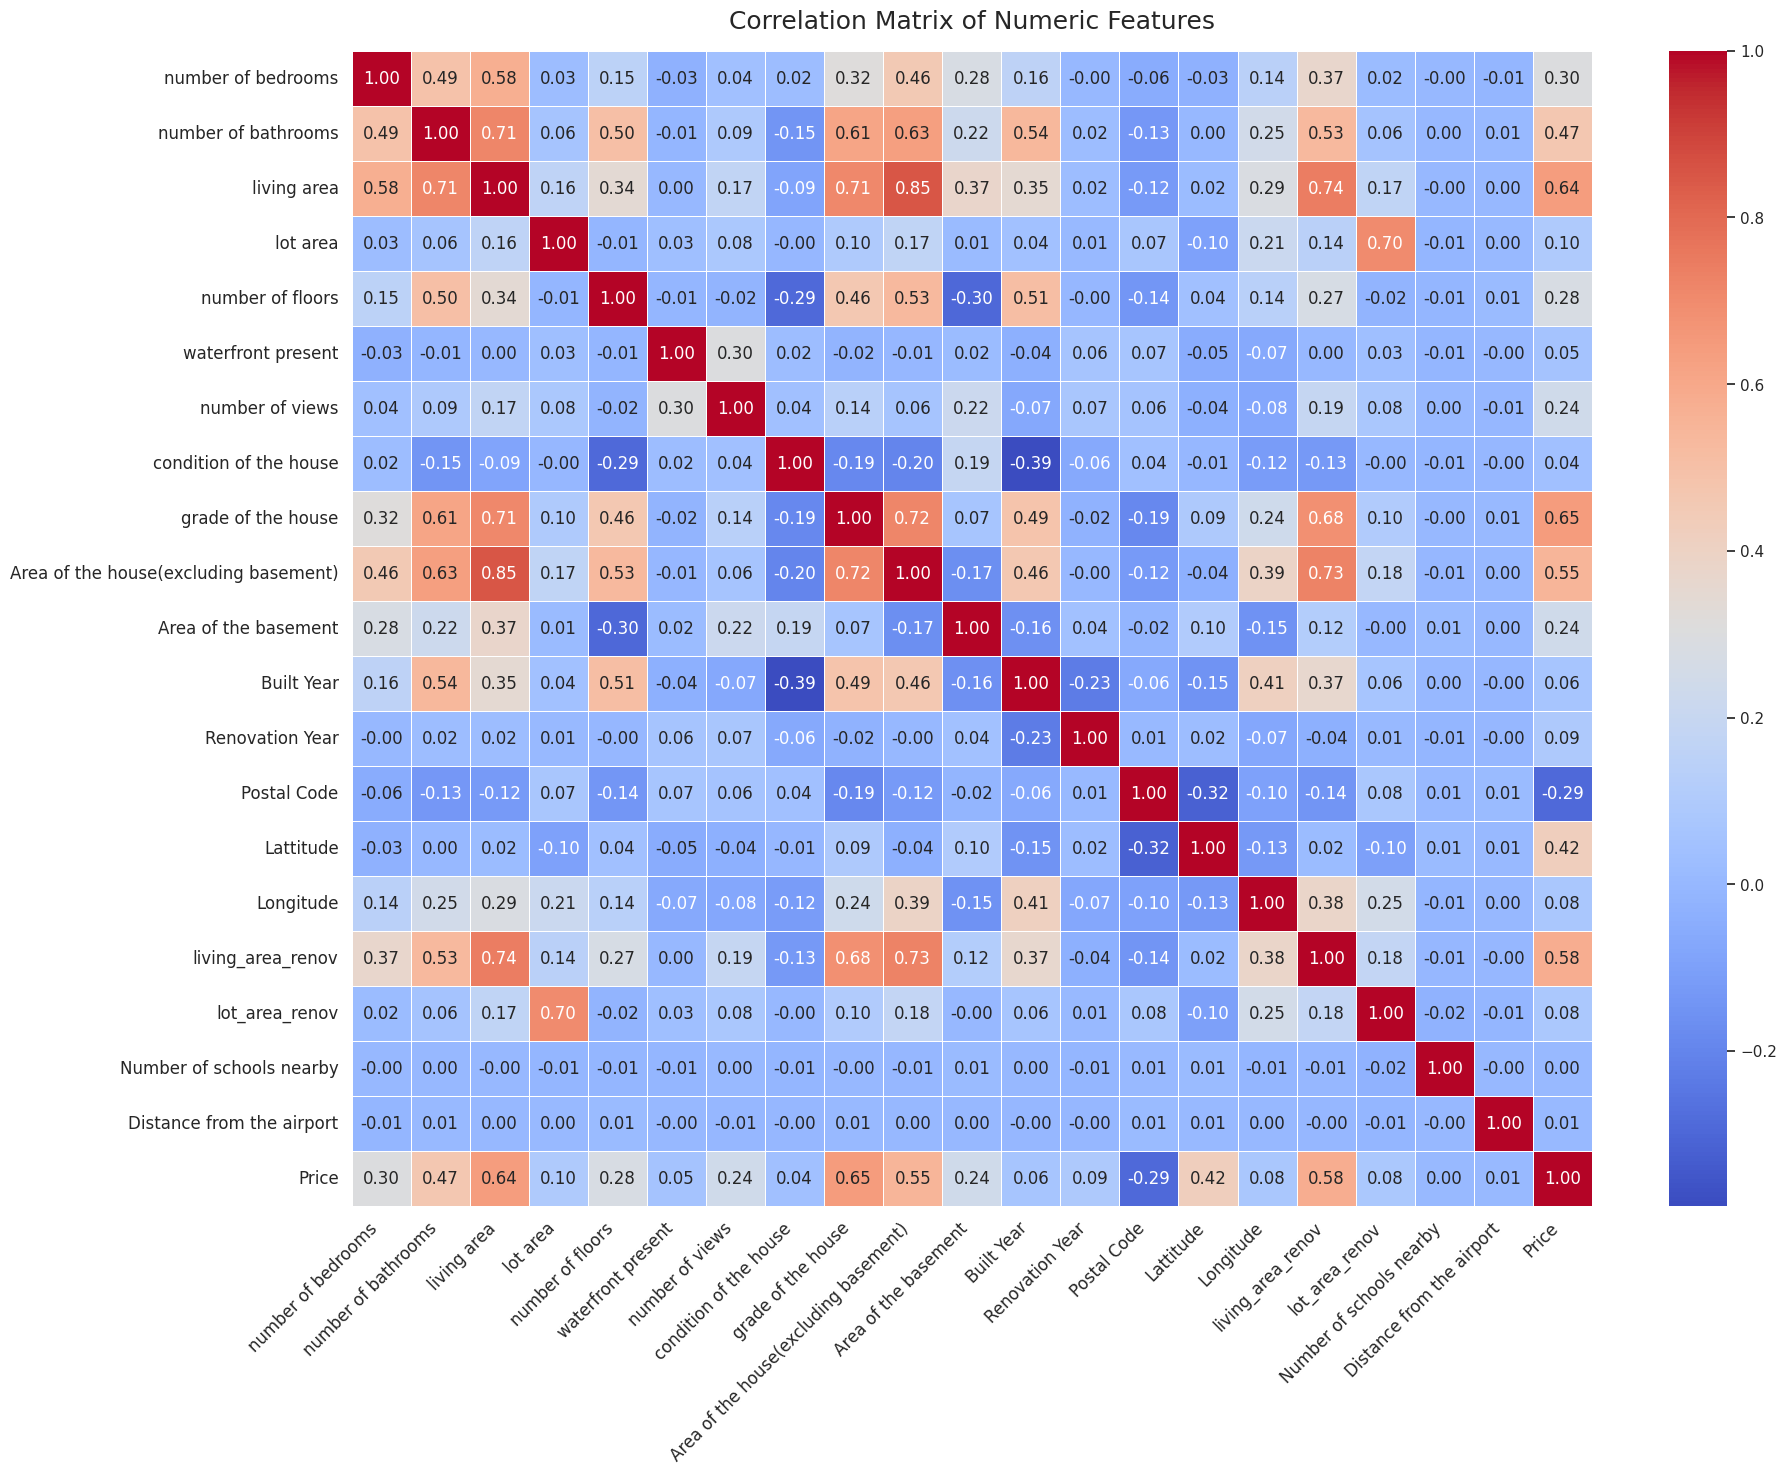

In [31]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')

# Improve the visualization aesthetics
heatmap.set_title('Correlation Matrix of Numeric Features', fontdict={'fontsize': 18}, pad=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [32]:
# Assuming 'data' is your DataFrame
correlation = data.corr()['Price'].sort_values(ascending=True)

# Display the sorted correlation values
print(correlation)


Postal Code                             -0.292302
Number of schools nearby                 0.004526
Distance from the airport                0.007366
condition of the house                   0.040893
waterfront present                       0.053626
Built Year                               0.064613
Longitude                                0.079526
lot_area_renov                           0.080028
Renovation Year                          0.091210
lot area                                 0.096560
Area of the basement                     0.237009
number of views                          0.241735
number of floors                         0.278908
number of bedrooms                       0.298335
Lattitude                                0.423100
number of bathrooms                      0.465757
Area of the house(excluding basement)    0.545840
living_area_renov                        0.578415
living area                              0.638694
grade of the house                       0.647400


### **Model Building**



In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
data.head(1)

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
3,4,2.5,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000


In [35]:
# data = data[['number of floors','waterfront present','number of bedrooms','Area of the basement','number of bathrooms','living_area_renov','Area of the house(excluding basement)','grade of the house','living area','Price']]
data1 = data.drop(columns=['Distance from the airport','Number of schools nearby','condition of the house'])

# Number of schools nearby                 0.003494
# Distance from the airport                0.006340
# condition of the house                   0.041564
# waterfront present                       0.055796
# Built Year                               0.057698

In [36]:
data1.head(5)

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Price
3,4,2.50,3310,42998,2.0,0,0,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,838000
4,3,2.00,2710,4500,1.5,0,0,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,805000
5,3,2.50,2600,4750,1.0,0,0,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,790000
6,5,3.25,3660,11995,2.0,0,2,10,3660,0,2006,0,122008,52.7637,-114.050,3320,11241,785000
7,3,1.75,2240,10578,2.0,0,0,8,1550,690,1923,0,122006,52.9254,-114.482,1570,10578,750000


In [37]:
X = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split # Make sure to import the function
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Linear Regression**

In [41]:
# Initialize the regression model
model = LinearRegression()

In [42]:
# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R-squared: {r2_lr}')

Mean Squared Error: 12694647766.641132
Mean Absolute Error: 84221.3471330421
Mean Absolute Percentage Error: 19.42%
R-squared: 0.7090384552090796


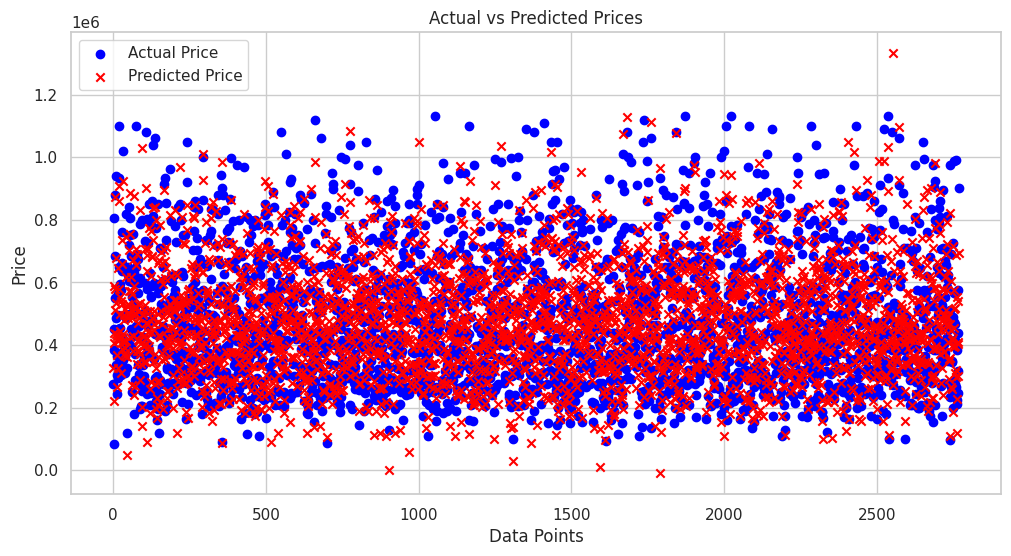

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', label='Actual Price')  # Actual prices
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted Price')  # Predicted prices
plt.title('Actual vs Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


In [45]:
# pip install plotly

In [46]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add scatter plot for actual prices
fig.add_trace(go.Scatter3d(
    x=list(range(len(y_test))),
    y=y_test,
    z=[0] * len(y_test),  # Use a constant z-value for actual prices
    mode='markers',
    marker=dict(color='blue', size=5),
    name='Actual Price'
))

# Add scatter plot for predicted prices
fig.add_trace(go.Scatter3d(
    x=list(range(len(y_pred))),
    y=y_pred,
    z=[1] * len(y_pred),  # Use a constant z-value for predicted prices
    mode='markers',
    marker=dict(color='red', size=5),
    name='Predicted Price'
))

# Update layout
fig.update_layout(
    title='3D Scatter Plot of Actual vs Predicted Prices',
    scene=dict(
        xaxis_title='Data Points',
        yaxis_title='Price',
        zaxis_title='Price Category'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the plot
fig.show()


# **Random Forest**

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# # Initialize the Random Forest Regressor
# model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and random_state as needed
# Initialize the Random Forest Regressor
model = RandomForestRegressor()
# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [49]:
# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R-squared: {r2_rf}')

Mean Squared Error: 5864579626.980893
Mean Absolute Error: 52831.50909061205
Mean Absolute Percentage Error: 12.07%
R-squared: 0.8655837342490357


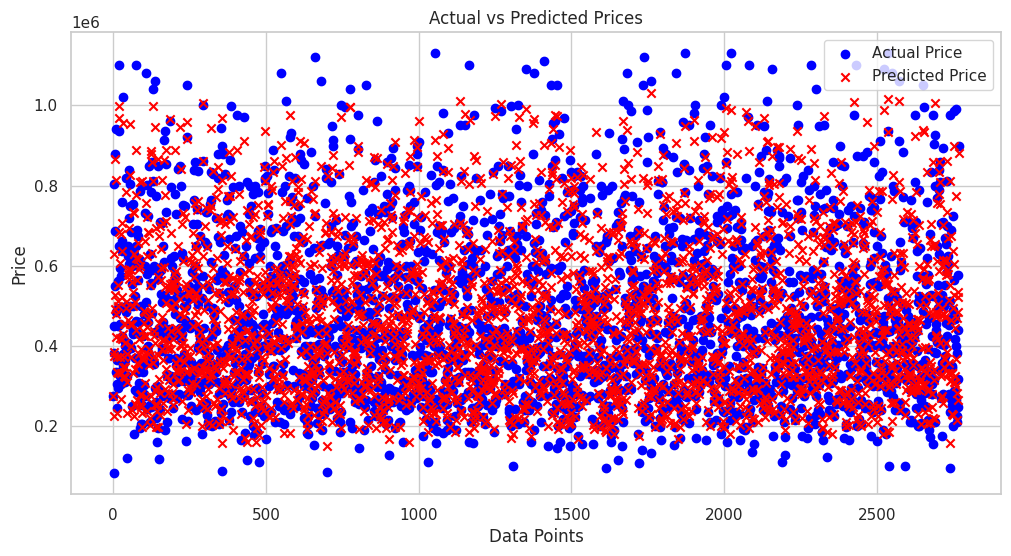

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', label='Actual Price')  # Actual prices
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted Price')  # Predicted prices
plt.title('Actual vs Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


In [51]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add scatter plot for actual prices
fig.add_trace(go.Scatter3d(
    x=list(range(len(y_test))),
    y=y_test,
    z=[0] * len(y_test),  # Use a constant z-value for actual prices
    mode='markers',
    marker=dict(color='blue', size=5),
    name='Actual Price'
))

# Add scatter plot for predicted prices
fig.add_trace(go.Scatter3d(
    x=list(range(len(y_pred))),
    y=y_pred,
    z=[1] * len(y_pred),  # Use a constant z-value for predicted prices
    mode='markers',
    marker=dict(color='red', size=5),
    name='Predicted Price'
))

# Update layout
fig.update_layout(
    title='3D Scatter Plot of Actual vs Predicted Prices',
    scene=dict(
        xaxis_title='Data Points',
        yaxis_title='Price',
        zaxis_title='Price Category'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the plot
fig.show()

# **SVR**

In [52]:
from sklearn.svm import SVR

In [53]:
# Initialize the SVR model
model = SVR(kernel='linear')  # 'rbf' is a commonly used kernel, but you can choose others like 'linear', 'poly', etc.

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R-squared: {r2_svr}')

Mean Squared Error: 38172897410.40196
Mean Absolute Error: 152143.60325043273
Mean Absolute Percentage Error: 35.99%
R-squared: 0.12507653588764134


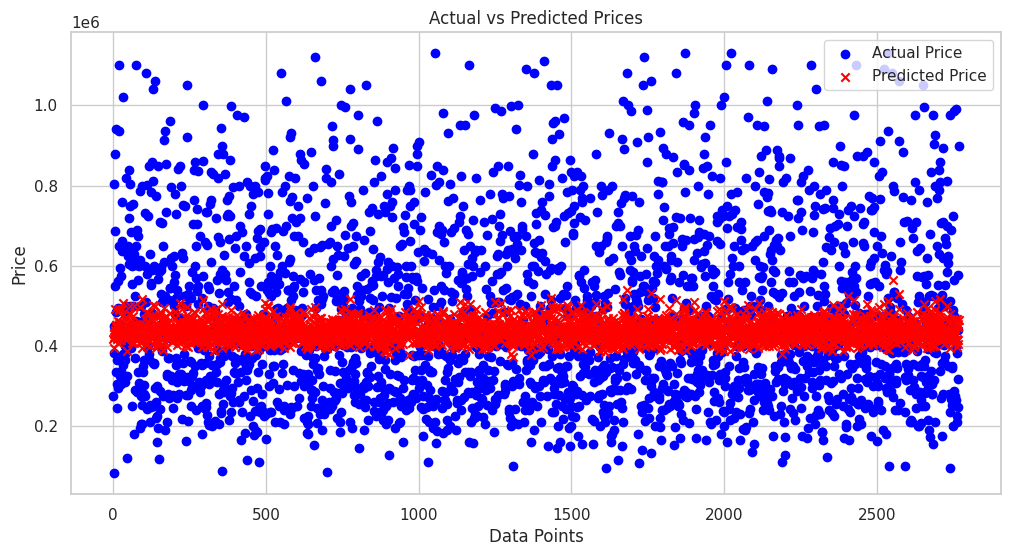

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', label='Actual Price')  # Actual prices
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted Price')  # Predicted prices
plt.title('Actual vs Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


In [56]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add scatter plot for actual prices
fig.add_trace(go.Scatter3d(
    x=list(range(len(y_test))),
    y=y_test,
    z=[0] * len(y_test),  # Use a constant z-value for actual prices
    mode='markers',
    marker=dict(color='blue', size=5),
    name='Actual Price'
))

# Add scatter plot for predicted prices
fig.add_trace(go.Scatter3d(
    x=list(range(len(y_pred))),
    y=y_pred,
    z=[1] * len(y_pred),  # Use a constant z-value for predicted prices
    mode='markers',
    marker=dict(color='red', size=5),
    name='Predicted Price'
))

# Update layout
fig.update_layout(
    title='3D Scatter Plot of Actual vs Predicted Prices',
    scene=dict(
        xaxis_title='Data Points',
        yaxis_title='Price',
        zaxis_title='Price Category'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the plot
fig.show()

## **Stacking- (SVR)**

In [74]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [84]:
# Define base models
base_models = [
    ('svr1', SVR(kernel='linear')),
    ('svr2', SVR(kernel='linear')),
    ('svr3', SVR(kernel='linear'))
]

stacking_regressor = StackingRegressor(estimators=base_models)

stacking_regressor.fit(X_train_scaled, y_train)

StackingRegressor(estimators=[('svr1', SVR(kernel='linear')),
                              ('svr2', SVR(kernel='linear')),
                              ('svr3', SVR(kernel='linear'))])

In [98]:
# Make predictions
y_pred = stacking_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_st_svr = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2_st_svr}')

Mean Squared Error: 21144593656.786114
Mean Absolute Error: 112845.27600594319
R-squared: 0.5153655503131297


## **Sequential**

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization # Import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [90]:
# Initialize the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))  # Input layer + first hidden layer
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='linear'))                          # Output layer

In [91]:
optimizer = Adam(learning_rate=0.01, clipnorm=1.0)

model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [92]:
history = model.fit(X_train, y_train,
                    epochs=500,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 58225029120.0000 - mean_squared_error: 58225029120.0000 - val_loss: 27784747008.0000 - val_mean_squared_error: 27784747008.0000
Epoch 2/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 26664054784.0000 - mean_squared_error: 26664054784.0000 - val_loss: 22543972352.0000 - val_mean_squared_error: 22543972352.0000
Epoch 3/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 26374520832.0000 - mean_squared_error: 26374520832.0000 - val_loss: 25038274560.0000 - val_mean_squared_error: 25038274560.0000
Epoch 4/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 26509303808.0000 - mean_squared_error: 26509303808.0000 - val_loss: 22197729280.0000 - val_mean_squared_error: 22197729280.0000
Epoch 5/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 24142755840.0000 - mean_squared_error: 24142755840.0000 - val_loss: 22212253696.0000 - val_mean_squared_error: 22212253696.0000
Epoch 6/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 

In [93]:
loss, mse = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18598227968.0000 - mean_squared_error: 18598227968.0000
Test Loss (MSE): 19326793728.0000


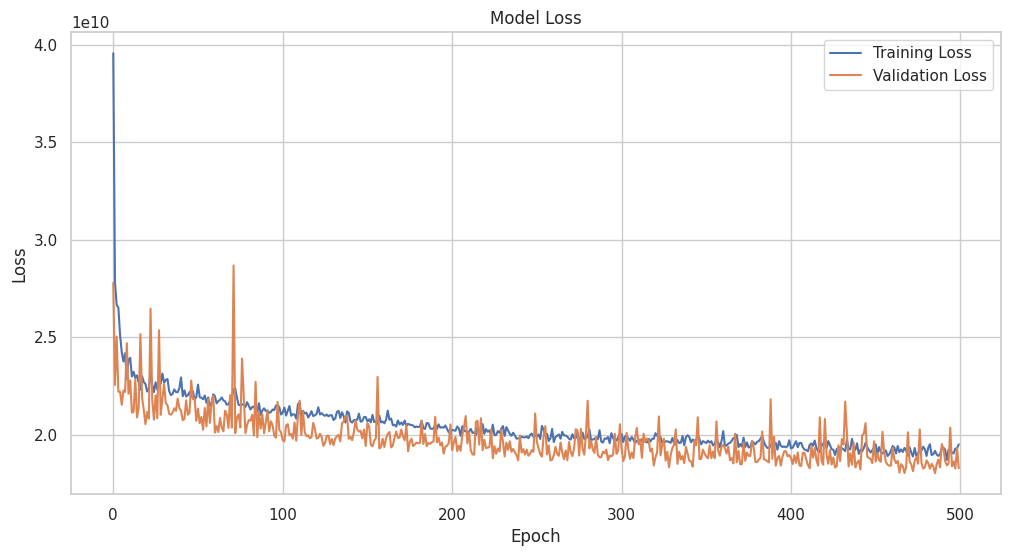

In [94]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import r2_score

In [96]:
# Make predictions
y_pred = model.predict(X_test)

# Compute R^2 score
r2_dl = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2_dl:.4f}")


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
R^2 Score: 0.5570


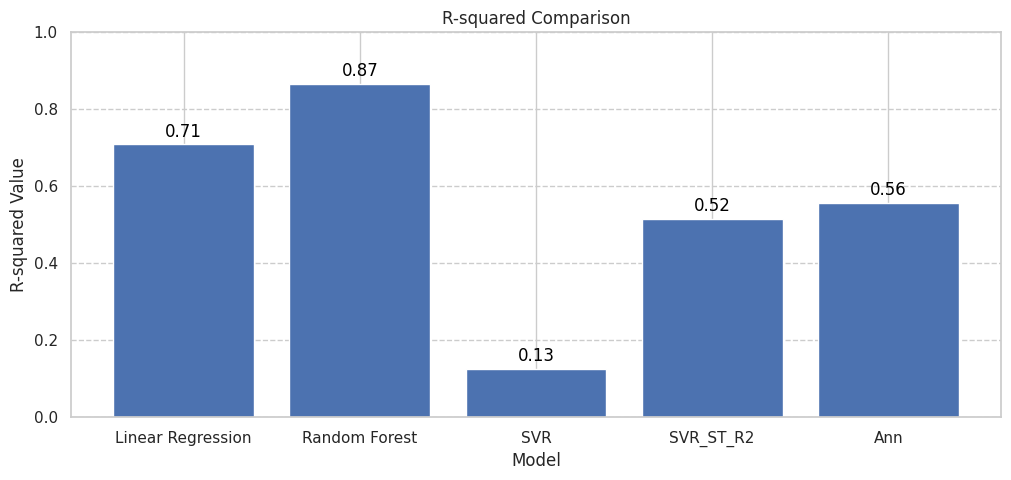

In [101]:
import matplotlib.pyplot as plt

# R-squared values for Linear Regression and Random Forest
r2_values = {'Linear Regression': r2_lr, 'Random Forest': r2_rf,'SVR': r2_svr,"SVR_ST_R2": r2_st_svr,"Ann": r2_dl}

# Create a bar chart
plt.figure(figsize=(12, 5))
plt.bar(r2_values.keys(), r2_values.values())
plt.ylim(0, 1)  # Setting the y-axis limit between 0 and 1 for better visibility
plt.xlabel('Model')
plt.ylabel('R-squared Value')
plt.title('R-squared Comparison')
plt.grid(axis='y', linestyle='--', alpha=1.0)

# Display the R-squared values on the bars
for i, value in enumerate(r2_values.values()):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=12, color='black')

plt.show()
